In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
import h5py as h5
import pywt
import keras
from keras.layers import Conv2D, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D

Using TensorFlow backend.


In [2]:
with h5.File("databaseXETR.h5", "r") as f:
    datasetNames = [n for n in f.keys()]

In [3]:
for n in datasetNames:
    print(n)

.GDAXI
5ABG.DE
AB1.DE
ADAG.DE
ADSGn.DE
AFXG.DE
AIXGn.DE
ALVG.DE
AQUG.DE
ARLG.DE
B5AG.DE
BAFG.DE
BASFn.DE
BAYGn.DE
BDTG.DE
BEIG.DE
BION.DE
BMWG.DE
BMWG_p.DE
BNRGn.DE
BOSG_p.DE
BVB.DE
BYWGnx.DE
CBKG.DE
CEVG.DE
CLSGn.DE
CONG.DE
CTNG.DE
D9CGn.DE
DAIGn.DE
DAZG.DE
DB1Gn.DE
DBKGn.DE
DEQGn.DE
DEXGn.DE
DEZG.DE
DLGS.DE
DOHG.DE
DPBGn.DE
DPWGn.DE
DRIG.DE
DRWG_p.DE
DTEGn.DE
DUEG.DE
DWNG.DE
EONGn.DE
EVDG.DE
EVTG.DE
FDXc1
FIEG.DE
FMEG.DE
FNTGn.DE
FPEG.DE
FPEG_p.DE
FRAG.DE
FREG.DE
FREG_p.DE
G1AG.DE
GAZPy.DE
GBFG.DE
GFJG.DE
GILG.DE
GMMG.DE
GWIG.DE
GXIG.DE
HDDG.DE
HEIG.DE
HHFGn.DE
HNKG.DE
HNKG_p.DE
HNRGn.DE
HOTG.DE
IFXGn.DE
INHG.DE
IVGG.DE
JUNG_p.DE
KBCG.DE
KCOGn.DE
KD8Gn.DE
KRNG.DE
KU2G.DE
LEOGn.DE
LHAG.DE
LING.DE
LPKG.DE
LXSG.DE
M5ZG.DE
MANG.DE
MANG_p.DE
MEOG.DE
MORG.DE
MRCG.DE
MTXGn.DE
MUVGn.DE
NAFG.DE
NDXG.DE
PFDGn.DE
PRAG.DE
PS4G.DE
PSHG_p.DE
PSMG_p.DE
PUMG.DE
PV.DE
QCEG.DE
QGEN.DE
QSCG.DE
R8RG.DE
RAAG.DE
RHKG.DE
RHMG.DE
RWEG.DE
RWEG_p.DE
S2MG.DE
S92G.DE
SAPG.DE
SAXG.DE
SDFG.DE
SFQN.DE
SGCG.DE
SIEG

# Abnormal subsequence detection: instrument code "ADAG.DE" 

In [5]:
f = h5.File("databaseXETR.h5", "r")
group = f["ADAG.DE"]
for key in group.keys():
    print(key)

TRADE


In [6]:
data = group["TRADE"].value

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [7]:
data

array([(4.55 , b'2005-01-03 09:03:00', 1104739380, 4.55, b'ADAG.DE', 4.55 ,  1, 4.55 , b'',  1000, 4.55     ),
       (4.52 , b'2005-01-03 09:46:00', 1104741960, 4.52, b'ADAG.DE', 4.52 ,  1, 4.52 , b'',  1500, 4.52     ),
       (4.59 , b'2005-01-03 09:47:00', 1104742020, 4.59, b'ADAG.DE', 4.59 ,  1, 4.59 , b'',   100, 4.59     ),
       ...,
       (5.251, b'2011-05-03 17:28:00', 1304436480, 5.26, b'ADAG.DE', 5.251, 10, 5.251, b'',  5868, 5.2569203),
       (5.26 , b'2011-05-03 17:29:00', 1304436540, 5.26, b'ADAG.DE', 5.251,  4, 5.26 , b'',  4904, 5.2599945),
       (5.25 , b'2011-05-03 17:35:00', 1304436900, 5.25, b'ADAG.DE', 5.25 ,  1, 5.25 , b'', 20833, 5.25     )],
      dtype=[('close', '<f4'), ('datetime', 'S32'), ('epochDateTime', '<i8'), ('high', '<f4'), ('instrumentcode', 'S16'), ('low', '<f4'), ('nbtick', '<i8'), ('open', '<f4'), ('rowEffDateTimeStr', 'S32'), ('volume', '<i8'), ('vwap', '<f4')])

In [8]:
f.close()

In [9]:
df = np.empty(shape=(data.shape[0],11),dtype='O')
for row in range(data.shape[0]):
    for col in range(11):
        df[row,col]= data[row][col]

In [10]:
df2= pd.DataFrame(df,columns = ["close","datetime","epochDateTime","high","instrumentcode","low","nbtick","open",\
                               "rowEffDateTimeStr","volume","vwap"])

In [11]:
df2.head(7)

,close,datetime,epochDateTime,high,instrumentcode,low,nbtick,open,rowEffDateTimeStr,volume,vwap
0,4.55,b'2005-01-03 09:03:00',1104739380,4.55,b'ADAG.DE',4.55,1,4.55,b'',1000,4.55
1,4.52,b'2005-01-03 09:46:00',1104741960,4.52,b'ADAG.DE',4.52,1,4.52,b'',1500,4.52
2,4.59,b'2005-01-03 09:47:00',1104742020,4.59,b'ADAG.DE',4.59,1,4.59,b'',100,4.59
3,4.56,b'2005-01-03 09:52:00',1104742320,4.56,b'ADAG.DE',4.56,1,4.56,b'',1500,4.56
4,4.57,b'2005-01-03 10:52:00',1104745920,4.57,b'ADAG.DE',4.57,1,4.57,b'',1,4.57
5,4.57,b'2005-01-03 11:04:00',1104746640,4.57,b'ADAG.DE',4.57,1,4.57,b'',1000,4.57
6,4.52,b'2005-01-03 11:09:00',1104746940,4.52,b'ADAG.DE',4.52,1,4.52,b'',70,4.52


In [12]:
df2["close"] = df2["close"].astype("float")
df2["epochDateTime"] = df2["epochDateTime"].astype("int")
df2["high"] = df2["high"].astype("float")
df2["low"] = df2["low"].astype("float")
df2["open"] = df2["open"].astype("float")
df2["vwap"] = df2["vwap"].astype("float")
df2["nbtick"] = df2["nbtick"].astype("int")
df2["volume"] = df2["volume"].astype("int")

In [13]:
df2["datetime"] = df2["datetime"].apply(lambda row:row.decode('UTF-8'))
df2["datetime"] = pd.to_datetime(df2["datetime"])

In [14]:
df3 = df2[["datetime","close"]].copy()

In [15]:
df3.index = df3["datetime"]
del df3["datetime"]

In [16]:
df3.head()

,close
datetime,
2005-01-03 09:03:00,4.55
2005-01-03 09:46:00,4.52
2005-01-03 09:47:00,4.59
2005-01-03 09:52:00,4.56
2005-01-03 10:52:00,4.57


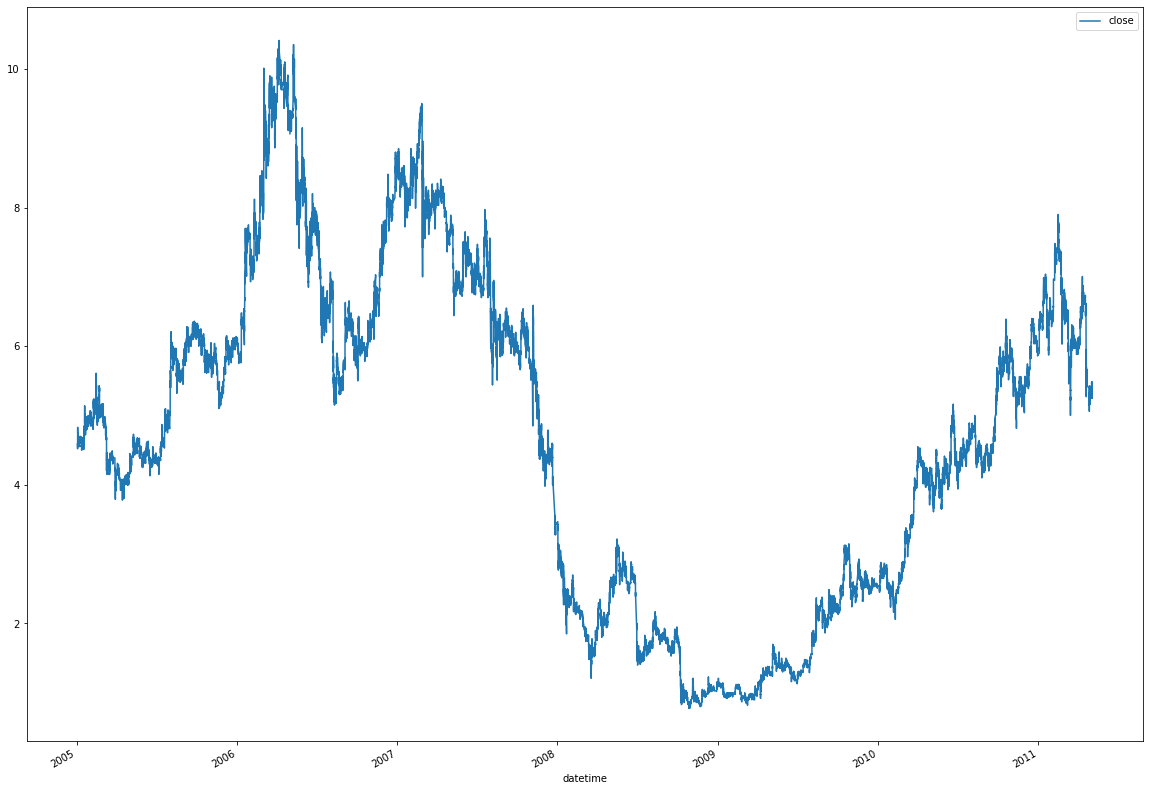

In [17]:
df3.plot(figsize=(20,15))

In [18]:
df3.shape

(156567, 1)

In [19]:
# creation of subsequences of size 28, the indices correspond to the dates of the middle of the subsequences
dico = {}
for i in range(0,df3.shape[0],28):
    ind = df3.index.values[i+14] 
    dico[ind] = df3.values[i:i+28]

In [20]:
newDf = pd.DataFrame.from_dict(dico,orient='index')

In [21]:
newDf.head()

,0
2005-01-03 12:18:00,"[[4.550000190734863], [4.519999980926514], [4...."
2005-01-04 11:20:00,"[[4.829999923706055], [4.75], [4.75], [4.75], ..."
2005-01-05 17:28:00,"[[4.679999828338623], [4.679999828338623], [4...."
2005-01-07 10:47:00,"[[4.599999904632568], [4.599999904632568], [4...."
2005-01-11 15:14:00,"[[4.699999809265137], [4.699999809265137], [4...."


In [22]:
newDf.index

DatetimeIndex(['2005-01-03 12:18:00', '2005-01-04 11:20:00',
               '2005-01-05 17:28:00', '2005-01-07 10:47:00',
               '2005-01-11 15:14:00', '2005-01-13 12:32:00',
               '2005-01-17 11:39:00', '2005-01-18 17:16:00',
               '2005-01-19 14:07:00', '2005-01-19 17:00:00',
               ...
               '2011-05-02 16:10:00', '2011-05-02 17:14:00',
               '2011-05-03 09:21:00', '2011-05-03 10:26:00',
               '2011-05-03 11:29:00', '2011-05-03 12:47:00',
               '2011-05-03 14:27:00', '2011-05-03 15:59:00',
               '2011-05-03 16:35:00', '2011-05-03 17:26:00'],
              dtype='datetime64[ns]', length=5592, freq=None)

In [23]:
newDf.columns = ["rawTs"]

In [24]:
newDf.loc[newDf.index == pd.to_datetime('2011-05-03 17:26:00')].values[0][0].shape

(19, 1)

In [25]:
newDf.drop(index =[pd.to_datetime('2011-05-03 17:26:00')],inplace=True)

In [26]:
X = np.zeros((newDf.shape[0],29),dtype='O')
for row,i in enumerate(newDf.index):
    X[row,0]= i
    for c in range(28):
        X[row,c+1]= newDf.loc[newDf.index == i].values[0][0][c][0]

In [27]:
df_last = pd.DataFrame(X)
df_last.columns = ["Time"] + ["ts{}".format(i+1) for i in range(28)]

In [28]:
df_last["Time"] = pd.to_datetime(df_last["Time"])
L = ["ts{}".format(i+1) for i in range(28)]
for c in L:
    df_last[c]=df_last[c].astype("float")

In [29]:
df_last.index = df_last["Time"]
del df_last["Time"]

In [30]:
df_last.head()

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,...,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28
Time,,,,,,,,,,,,,,,,,,,,,
2005-01-03 12:18:00,4.55,4.52,4.59,4.56,4.57,4.57,4.52,4.52,4.57,4.60,...,4.68,4.70,4.70,4.70,4.70,4.73,4.75,4.75,4.78,4.80
2005-01-04 11:20:00,4.83,4.75,4.75,4.75,4.75,4.80,4.69,4.69,4.76,4.75,...,4.58,4.61,4.57,4.60,4.65,4.65,4.65,4.67,4.69,4.69
2005-01-05 17:28:00,4.68,4.68,4.62,4.66,4.68,4.67,4.68,4.68,4.70,4.66,...,4.65,4.65,4.65,4.65,4.61,4.61,4.60,4.60,4.60,4.60
2005-01-07 10:47:00,4.60,4.60,4.64,4.58,4.57,4.55,4.65,4.60,4.65,4.65,...,4.64,4.65,4.68,4.64,4.69,4.69,4.65,4.65,4.65,4.69
2005-01-11 15:14:00,4.70,4.70,4.70,4.70,4.70,4.60,4.68,4.68,4.60,4.68,...,4.55,4.57,4.56,4.57,4.57,4.57,4.57,4.57,4.57,4.56


In [31]:
df_last.shape

(5591, 28)

## Analysis with discrete wavelet transform

In [32]:
df_last_dwt = df_last.copy()

In [33]:
for i in range(df_last_dwt.shape[0]):
    cA, cD = pywt.dwt(df_last_dwt.loc[df_last_dwt.index == df_last_dwt.index[i]].values, 'db1')
    C = np.concatenate((cA.T,cD.T),axis=0)
    df_last_dwt.loc[df_last_dwt.index == df_last_dwt.index[i]] = C.T
    

In [34]:
df_last_dwt.shape

(5591, 28)

In [35]:
df_last_dwt.head(3)

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,...,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28
Time,,,,,,,,,,,,,,,,,,,,,
2005-01-03 12:18:00,6.413459,6.470027,6.462956,6.392245,6.484169,6.505382,6.547809,6.590235,6.632662,6.632661,...,-0.021213,0.000000,-0.098995,0.014142,0.000000,-0.014142,0.000000,-0.021213,0.000000,-0.014142
2005-01-04 11:20:00,6.774083,6.717514,6.752870,6.632662,6.724586,6.604377,6.583164,6.505382,6.491240,6.498311,...,0.007071,-0.042426,0.049498,0.000000,0.014142,-0.021213,-0.021213,0.000000,-0.014142,0.000000
2005-01-05 17:28:00,6.618519,6.561951,6.611448,6.618519,6.618519,6.618519,6.639733,6.561951,6.618519,6.576093,...,0.028284,-0.028284,-0.007071,-0.028284,-0.028284,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
df_last.head(3)

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,...,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28
Time,,,,,,,,,,,,,,,,,,,,,
2005-01-03 12:18:00,4.55,4.52,4.59,4.56,4.57,4.57,4.52,4.52,4.57,4.60,...,4.68,4.70,4.70,4.70,4.70,4.73,4.75,4.75,4.78,4.80
2005-01-04 11:20:00,4.83,4.75,4.75,4.75,4.75,4.80,4.69,4.69,4.76,4.75,...,4.58,4.61,4.57,4.60,4.65,4.65,4.65,4.67,4.69,4.69
2005-01-05 17:28:00,4.68,4.68,4.62,4.66,4.68,4.67,4.68,4.68,4.70,4.66,...,4.65,4.65,4.65,4.65,4.61,4.61,4.60,4.60,4.60,4.60


In [37]:
X_std = df_last_dwt.copy()
for c in X_std.columns:
    scaler = StandardScaler()
    scaler.fit(X_std[c].values.reshape(-1, 1))
    X_std[c] = scaler.transform(X_std[c].values.reshape(-1, 1))
    del scaler

In [38]:
df_results=df_last.copy()

### Isolation Forest

In [39]:
algoDetector = IsolationForest(n_estimators=300,n_jobs=-1)
algoDetector.fit(X_std)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=300,
                n_jobs=-1, random_state=None, verbose=0, warm_start=False)

In [40]:
df_results["score_IF"] = -algoDetector.score_samples(X_std)

In [43]:
df_results.sort_values("score_IF",ascending=False)["score_IF"].head(20)

Time
2006-04-20 15:16:00    0.661357
2006-04-04 13:55:00    0.653711
2006-05-10 09:50:00    0.651782
2006-04-07 17:36:00    0.642152
2006-05-12 11:46:00    0.640619
2006-03-03 16:29:00    0.639643
2006-04-05 16:37:00    0.637441
2006-05-09 09:14:00    0.634399
2006-03-24 12:03:00    0.634187
2006-04-05 15:05:00    0.633266
2006-04-06 17:07:00    0.632036
2006-03-21 12:59:00    0.630857
2006-03-03 17:10:00    0.629801
2006-04-05 10:55:00    0.627554
2006-05-15 09:44:00    0.627546
2006-03-17 16:53:00    0.626813
2006-03-20 09:10:00    0.625899
2006-04-19 17:17:00    0.624936
2006-03-20 11:44:00    0.623663
2006-04-10 14:55:00    0.622865
Name: score_IF, dtype: float64

### Deep auto encoder

In [44]:
X_train, X_val = train_test_split(X_std, test_size=0.10)

In [49]:
input_data = Input(shape=(28,))
encoded = Dense(25, activation='relu')(input_data)
encoded = Dense(20, activation='relu')(encoded)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = Dense(28, activation=None)(decoded)

In [50]:
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
callback_AE = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=60,verbose=1),\
                    keras.callbacks.ModelCheckpoint(filepath='TS_AE.h5',monitor='val_loss',save_best_only=True,\
                                                  save_weights_only=True,mode='min',verbose=1)]

In [52]:
history = autoencoder.fit(X_train, X_train,
                epochs=70,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=callback_AE)

Train on 5031 samples, validate on 560 samples
Epoch 1/70
5031/5031 [==============================] - 0s 64us/step - loss: 0.9942 - val_loss: 0.8884

Epoch 00001: val_loss improved from inf to 0.88835, saving model to TS_AE.h5
Epoch 2/70
5031/5031 [==============================] - 0s 11us/step - loss: 0.8925 - val_loss: 0.7335

Epoch 00002: val_loss improved from 0.88835 to 0.73351, saving model to TS_AE.h5
Epoch 3/70
5031/5031 [==============================] - 0s 12us/step - loss: 0.6866 - val_loss: 0.5739

Epoch 00003: val_loss improved from 0.73351 to 0.57390, saving model to TS_AE.h5
Epoch 4/70
5031/5031 [==============================] - 0s 12us/step - loss: 0.5695 - val_loss: 0.5084

Epoch 00004: val_loss improved from 0.57390 to 0.50845, saving model to TS_AE.h5
Epoch 5/70
5031/5031 [==============================] - 0s 11us/step - loss: 0.5197 - val_loss: 0.4821

Epoch 00005: val_loss improved from 0.50845 to 0.48215, saving model to TS_AE.h5
Epoch 6/70
5031/5031 [==========

5031/5031 [==============================] - 0s 9us/step - loss: 0.3141 - val_loss: 0.3192

Epoch 00046: val_loss did not improve from 0.31862
Epoch 47/70
5031/5031 [==============================] - 0s 9us/step - loss: 0.3139 - val_loss: 0.3186

Epoch 00047: val_loss improved from 0.31862 to 0.31862, saving model to TS_AE.h5
Epoch 48/70
5031/5031 [==============================] - 0s 9us/step - loss: 0.3134 - val_loss: 0.3193

Epoch 00048: val_loss did not improve from 0.31862
Epoch 49/70
5031/5031 [==============================] - 0s 9us/step - loss: 0.3128 - val_loss: 0.3178

Epoch 00049: val_loss improved from 0.31862 to 0.31784, saving model to TS_AE.h5
Epoch 50/70
5031/5031 [==============================] - 0s 9us/step - loss: 0.3119 - val_loss: 0.3195

Epoch 00050: val_loss did not improve from 0.31784
Epoch 51/70
5031/5031 [==============================] - 0s 10us/step - loss: 0.3116 - val_loss: 0.3173

Epoch 00051: val_loss improved from 0.31784 to 0.31735, saving model to 

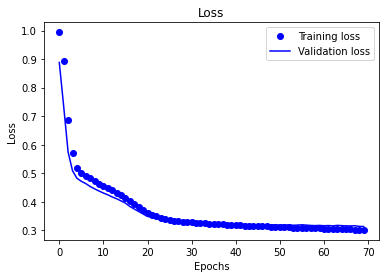

In [53]:
history_dict=history.history
training_loss = history_dict['loss'][0:70:1]
validation_loss = history_dict['val_loss'][0:70:1]
epochs = range(0, 70,1)
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
X_recons = autoencoder.predict(X_std)
Error =X_std- X_recons
df_results["score_AE"] = ((Error)**2).sum(axis=1)

In [55]:
df_results.sort_values("score_AE",ascending=False)["score_AE"].head(20)

Time
2007-03-14 09:12:00    405.244464
2007-12-27 09:16:00    340.786005
2008-06-30 09:10:00    252.883690
2006-07-17 11:02:00    178.074629
2006-06-09 09:12:00    167.447714
2006-05-15 09:44:00    161.169377
2006-03-03 16:29:00    155.690143
2007-02-28 09:14:00    155.493165
2006-05-10 09:50:00    139.755396
2005-02-02 15:04:00    133.291862
2006-05-23 09:19:00    127.448233
2006-05-29 16:55:00    120.960870
2006-05-30 09:54:00    113.041351
2010-05-10 09:22:00    112.994266
2007-01-19 09:02:00    110.481428
2006-06-22 11:48:00    103.991440
2006-05-31 09:04:00    100.138083
2006-06-02 12:17:00     99.155063
2006-02-21 16:09:00     96.871254
2006-03-17 09:32:00     96.631312
Name: score_AE, dtype: float64

### KNN detector

In [56]:
def knnDetector(df,k=50):
    X = df.copy()
    Y = X.index
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(X_std, Y)
    distances, _ = knn.kneighbors()
    X["knn_score"] = 0.0
    for i in range(X.shape[0]):
        X.loc[X.index[i],"knn_score"] = distances[i].mean()


    return X["knn_score"]

In [59]:
df_results["knn_score"]=knnDetector(X_std,k=100)

In [60]:
df_results.sort_values("knn_score",ascending=False)["knn_score"].head(20)

Time
2007-02-28 09:14:00    47.537036
2007-12-27 09:16:00    24.390216
2006-03-03 16:29:00    21.807711
2007-03-14 09:12:00    21.411272
2008-06-30 09:10:00    19.223311
2007-08-01 17:22:00    17.134287
2006-06-09 09:12:00    16.511881
2006-05-23 09:19:00    15.834616
2006-07-17 11:02:00    15.403094
2006-05-15 09:44:00    14.084190
2006-05-30 09:54:00    13.835825
2006-01-18 17:09:00    13.070709
2006-05-10 09:50:00    12.738535
2006-04-20 15:16:00    12.728126
2006-07-31 17:06:00    12.646792
2006-05-18 09:49:00    11.954767
2006-06-14 16:51:00    11.657315
2006-03-03 17:10:00    11.587043
2006-05-29 16:55:00    11.493437
2006-05-12 11:46:00    11.476622
Name: knn_score, dtype: float64

### Local outlier factor (LOF)

In [61]:
LOF = LocalOutlierFactor(n_neighbors=100)
LOF.fit(X_std)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=100, novelty=False, p=2)

In [62]:
df_results["LOF_score"] = - LOF.negative_outlier_factor_

In [63]:
df_results.sort_values("LOF_score",ascending=False)["LOF_score"].head(20)

Time
2007-02-28 09:14:00    9.970785
2007-12-27 09:16:00    6.390137
2008-06-30 09:10:00    5.470712
2007-03-14 09:12:00    4.830231
2006-03-03 16:29:00    4.584368
2007-08-01 17:22:00    4.207022
2006-06-09 09:12:00    4.134316
2006-05-23 09:19:00    4.116452
2006-07-17 11:02:00    3.960488
2008-01-24 09:23:00    3.756880
2008-01-23 09:07:00    3.635231
2006-01-18 17:09:00    3.523169
2010-05-10 09:22:00    3.443550
2006-05-15 09:44:00    3.405792
2006-05-30 09:54:00    3.260516
2005-04-15 14:17:00    3.237997
2005-02-02 15:04:00    3.214858
2006-07-31 17:06:00    3.179706
2006-05-10 09:50:00    3.119960
2006-03-03 17:10:00    3.113140
Name: LOF_score, dtype: float64

## Analysis with convolutional auto-encoder (without DWT)

### 1D convolutional auto-encoder

In [64]:
X_train, X_val = train_test_split(df_last, test_size=0.10)
X_train=X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
X_val=X_val.values.reshape(X_val.shape[0],X_val.shape[1],1)
print(X_train.shape)
print(X_val.shape)

(5031, 28, 1)
(560, 28, 1)


In [67]:
input_data1D = Input((28,1))
encoded1D = Conv1D(32, 3, activation='relu')(input_data1D)
encoded1D = MaxPooling1D(2)(encoded1D)
encoded1D = Conv1D(64, 3, activation='relu')(encoded1D)
encoded1D = MaxPooling1D(2)(encoded1D)
encoded1D = Conv1D(64, 3, activation='relu')(encoded1D)
encoded1D = Flatten()(encoded1D)
encoded1D = Dense(49, activation='relu')(encoded1D)
decoded1D = Reshape((7,7))(encoded1D)

decoded1D = Conv1D(64,3, activation='relu', padding='same')(decoded1D)
decoded1D = UpSampling1D(2)(decoded1D)
decoded1D = Conv1D(64,3, activation='relu', padding='same')(decoded1D)
decoded1D = UpSampling1D(2)(decoded1D)
decoded1D = Conv1D(32,3, activation='relu', padding='same')(decoded1D)
decoded1D = Conv1D(1,3, activation=None, padding='same')(decoded1D)
autoencoder1D = Model(input_data1D, decoded1D)
autoencoder1D.compile(optimizer='adam', loss='mean_squared_error')


In [68]:
autoencoder1D.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 1)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 26, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 11, 64)            6208      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0   

In [69]:
callback_Conv1DAE = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=60,verbose=1),\
                    keras.callbacks.ModelCheckpoint(filepath='Conv_1DAE_DIOR.h5',monitor='val_loss',save_best_only=True,\
                                                  save_weights_only=True,mode='min',verbose=1)]


In [70]:
history1D = autoencoder1D.fit(X_train, X_train,
                epochs=70,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=callback_Conv1DAE)

Train on 5031 samples, validate on 560 samples
Epoch 1/70
5031/5031 [==============================] - 2s 339us/step - loss: 15.6299 - val_loss: 1.3237

Epoch 00001: val_loss improved from inf to 1.32372, saving model to Conv_1DAE_DIOR.h5
Epoch 2/70
5031/5031 [==============================] - 1s 133us/step - loss: 1.3455 - val_loss: 0.6838

Epoch 00002: val_loss improved from 1.32372 to 0.68380, saving model to Conv_1DAE_DIOR.h5
Epoch 3/70
5031/5031 [==============================] - 1s 133us/step - loss: 0.3505 - val_loss: 0.1582

Epoch 00003: val_loss improved from 0.68380 to 0.15817, saving model to Conv_1DAE_DIOR.h5
Epoch 4/70
5031/5031 [==============================] - 1s 132us/step - loss: 0.1081 - val_loss: 0.0627

Epoch 00004: val_loss improved from 0.15817 to 0.06268, saving model to Conv_1DAE_DIOR.h5
Epoch 5/70
5031/5031 [==============================] - 1s 139us/step - loss: 0.0458 - val_loss: 0.0302

Epoch 00005: val_loss improved from 0.06268 to 0.03020, saving model to

5031/5031 [==============================] - 1s 132us/step - loss: 0.0018 - val_loss: 0.0015

Epoch 00045: val_loss improved from 0.00154 to 0.00153, saving model to Conv_1DAE_DIOR.h5
Epoch 46/70
5031/5031 [==============================] - 1s 131us/step - loss: 0.0018 - val_loss: 0.0015

Epoch 00046: val_loss did not improve from 0.00153
Epoch 47/70
5031/5031 [==============================] - 1s 130us/step - loss: 0.0018 - val_loss: 0.0015

Epoch 00047: val_loss did not improve from 0.00153
Epoch 48/70
5031/5031 [==============================] - 1s 132us/step - loss: 0.0018 - val_loss: 0.0016

Epoch 00048: val_loss did not improve from 0.00153
Epoch 49/70
5031/5031 [==============================] - 1s 132us/step - loss: 0.0018 - val_loss: 0.0016

Epoch 00049: val_loss did not improve from 0.00153
Epoch 50/70
5031/5031 [==============================] - 1s 131us/step - loss: 0.0018 - val_loss: 0.0015

Epoch 00050: val_loss did not improve from 0.00153
Epoch 51/70
5031/5031 [========

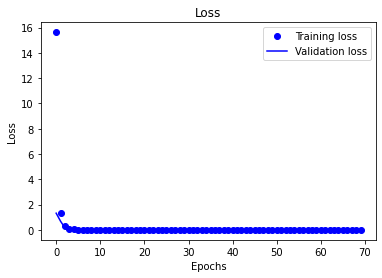

In [71]:
history_dict=history1D.history
training_loss = history_dict['loss'][0:70:1]
validation_loss = history_dict['val_loss'][0:70:1]
epochs = range(0, 70,1)
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
X_recons_conv1D = autoencoder1D.predict(df_last.values.reshape(df_last.shape[0],df_last.shape[1],1))
X_recons_conv1D=X_recons_conv1D.reshape(X_recons_conv1D.shape[0],X_recons_conv1D.shape[1])
Error1D =df_last- X_recons_conv1D

In [73]:
df_results["score_AE_conv1D"] = ((Error1D)**2).sum(axis=1)

In [74]:
df_results.sort_values("score_AE_conv1D",ascending=False)["score_AE_conv1D"].head(20)

Time
2007-02-28 09:14:00    6.773136
2006-03-03 16:29:00    4.749167
2011-04-20 09:12:00    4.241805
2007-11-05 17:18:00    2.507469
2006-05-09 09:14:00    2.037173
2011-02-24 09:09:00    1.673726
2007-08-01 17:22:00    1.525658
2011-03-15 17:23:00    1.516853
2007-12-27 09:16:00    1.452969
2006-05-15 09:44:00    1.369833
2008-06-30 09:10:00    1.285647
2007-07-20 09:10:00    1.211821
2007-03-14 09:12:00    1.209432
2007-08-06 17:22:00    1.096665
2006-05-23 09:19:00    1.017669
2006-01-31 09:02:00    1.002549
2006-01-18 17:09:00    1.000421
2006-06-09 17:20:00    0.945976
2006-05-26 09:04:00    0.929849
2007-02-12 09:14:00    0.928047
Name: score_AE_conv1D, dtype: float64

### 2D convolutional auto-encoder

In [75]:
def matrix_transformation(df):
    X=df.copy()
    X_np = np.zeros((X.shape[0],X.shape[1],X.shape[1]))
    for i in range(X.shape[0]):
        for col in range(X.shape[1]):
            cols_list = []
            for j in range(X.shape[1]):
                colN = col+1+j
                if colN >28:
                    colN=colN%28
                
                cols_list.append("ts{}".format(colN))
            
            X_np[i,col,:] = df.loc[df.index[i]][cols_list].values
        
    return X_np


In [76]:
df_img = matrix_transformation(df_last)

In [79]:
X_train, X_val = train_test_split(df_img, test_size=0.10)
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_val=X_val.reshape(X_val.shape[0],28,28,1)
print(X_train.shape)
print(X_val.shape)

(5031, 28, 28, 1)
(560, 28, 28, 1)


In [89]:
input_data2D = Input((28, 28,1))
encoded2D = Conv2D(32, (3, 3), activation='relu')(input_data2D)
encoded2D = MaxPooling2D((2, 2))(encoded2D)
encoded2D = Conv2D(64, (3, 3), activation='relu')(encoded2D)
encoded2D = MaxPooling2D((2, 2))(encoded2D)
encoded2D = Conv2D(64, (3, 3), activation='relu')(encoded2D)
encoded2D = Flatten()(encoded2D)
encoded2D = Dense(49, activation='relu')(encoded2D)
decoded2D = Reshape((7,7,1))(encoded2D)
decoded2D = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(decoded2D)
decoded2D = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(decoded2D)
decoded2D = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(decoded2D)
decoded2D = Conv2D(1, (3, 3), activation=None, padding='same')(decoded2D)

autoencoder2D = Model(input_data2D, decoded2D)
autoencoder2D.compile(optimizer='adam', loss='mean_squared_error')

In [90]:
callback_ConvAE2D = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=60,verbose=1),\
                    keras.callbacks.ModelCheckpoint(filepath='Conv_AE_DIOR.h5',monitor='val_loss',save_best_only=True,\
                                                  save_weights_only=True,mode='min',verbose=1)]


In [91]:
history2D = autoencoder2D.fit(X_train, X_train,
                epochs=140,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=callback_ConvAE2D)

Train on 5031 samples, validate on 560 samples
Epoch 1/140
5031/5031 [==============================] - 15s 3ms/step - loss: 14.3471 - val_loss: 4.3328

Epoch 00001: val_loss improved from inf to 4.33279, saving model to Conv_AE_DIOR.h5
Epoch 2/140
5031/5031 [==============================] - 15s 3ms/step - loss: 3.0542 - val_loss: 2.1254

Epoch 00002: val_loss improved from 4.33279 to 2.12539, saving model to Conv_AE_DIOR.h5
Epoch 3/140
5031/5031 [==============================] - 16s 3ms/step - loss: 1.4924 - val_loss: 1.2413

Epoch 00003: val_loss improved from 2.12539 to 1.24135, saving model to Conv_AE_DIOR.h5
Epoch 4/140
5031/5031 [==============================] - 17s 3ms/step - loss: 0.9796 - val_loss: 0.8521

Epoch 00004: val_loss improved from 1.24135 to 0.85205, saving model to Conv_AE_DIOR.h5
Epoch 5/140
5031/5031 [==============================] - 17s 3ms/step - loss: 0.7059 - val_loss: 0.6133

Epoch 00005: val_loss improved from 0.85205 to 0.61332, saving model to Conv_AE

5031/5031 [==============================] - 32s 6ms/step - loss: 0.0734 - val_loss: 0.0753

Epoch 00044: val_loss improved from 0.07536 to 0.07533, saving model to Conv_AE_DIOR.h5
Epoch 45/140
5031/5031 [==============================] - 32s 6ms/step - loss: 0.0724 - val_loss: 0.0734

Epoch 00045: val_loss improved from 0.07533 to 0.07337, saving model to Conv_AE_DIOR.h5
Epoch 46/140
5031/5031 [==============================] - 32s 6ms/step - loss: 0.0723 - val_loss: 0.0735

Epoch 00046: val_loss did not improve from 0.07337
Epoch 47/140
5031/5031 [==============================] - 37s 7ms/step - loss: 0.0723 - val_loss: 0.0720

Epoch 00047: val_loss improved from 0.07337 to 0.07197, saving model to Conv_AE_DIOR.h5
Epoch 48/140
5031/5031 [==============================] - 35s 7ms/step - loss: 0.0708 - val_loss: 0.0740

Epoch 00048: val_loss did not improve from 0.07197
Epoch 49/140
5031/5031 [==============================] - 32s 6ms/step - loss: 0.0704 - val_loss: 0.0707

Epoch 00049

5031/5031 [==============================] - 88s 17ms/step - loss: 0.0621 - val_loss: 0.0572

Epoch 00090: val_loss improved from 0.05793 to 0.05718, saving model to Conv_AE_DIOR.h5
Epoch 91/140
5031/5031 [==============================] - 88s 17ms/step - loss: 0.0585 - val_loss: 0.0581

Epoch 00091: val_loss did not improve from 0.05718
Epoch 92/140
5031/5031 [==============================] - 70s 14ms/step - loss: 0.0582 - val_loss: 0.0574

Epoch 00092: val_loss did not improve from 0.05718
Epoch 93/140
5031/5031 [==============================] - 96s 19ms/step - loss: 0.0561 - val_loss: 0.0571

Epoch 00093: val_loss improved from 0.05718 to 0.05712, saving model to Conv_AE_DIOR.h5
Epoch 94/140
5031/5031 [==============================] - 88s 17ms/step - loss: 0.0565 - val_loss: 0.0582

Epoch 00094: val_loss did not improve from 0.05712
Epoch 95/140
5031/5031 [==============================] - 102s 20ms/step - loss: 0.0586 - val_loss: 0.0566

Epoch 00095: val_loss improved from 0.057

5031/5031 [==============================] - 124s 25ms/step - loss: 0.0556 - val_loss: 0.0551

Epoch 00138: val_loss did not improve from 0.05381
Epoch 139/140
5031/5031 [==============================] - 123s 24ms/step - loss: 0.0605 - val_loss: 0.0600

Epoch 00139: val_loss did not improve from 0.05381
Epoch 140/140
5031/5031 [==============================] - 130s 26ms/step - loss: 0.0551 - val_loss: 0.0570

Epoch 00140: val_loss did not improve from 0.05381


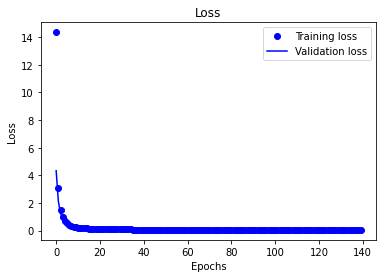

In [93]:
history_dict=history2D.history
training_loss = history_dict['loss'][0:140:1]
validation_loss = history_dict['val_loss'][0:140:1]
epochs = range(0, 140,1)
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [94]:
X_recons_img = autoencoder2D.predict(df_img.reshape(df_img.shape[0],28,28,1))
Error2D =df_img.reshape(df_img.shape[0],28,28,1)- X_recons_img
Error2D=Error2D.reshape(Error2D.shape[0],28,28)
df_results["score_AE_Conv2D"] = ((Error2D)**2).sum(axis=1).sum(axis=1)

In [95]:
df_results.sort_values("score_AE_Conv2D",ascending=False)["score_AE_Conv2D"].head(20)

Time
2007-02-28 09:14:00    403.210979
2006-03-03 16:29:00    401.279850
2006-05-09 09:14:00    294.087357
2006-04-07 14:53:00    232.911736
2006-05-10 09:50:00    231.156784
2006-04-07 11:42:00    230.123871
2006-04-04 13:55:00    226.718022
2006-04-07 17:36:00    224.162065
2006-05-10 13:19:00    220.618360
2006-04-05 12:40:00    220.124636
2006-05-09 15:10:00    217.002357
2006-04-05 15:05:00    216.876301
2006-05-09 10:09:00    215.329020
2006-05-09 11:28:00    213.943405
2006-05-12 11:46:00    213.928545
2006-04-19 12:16:00    213.361403
2006-04-05 10:55:00    212.873783
2006-05-09 17:01:00    212.809805
2006-04-19 17:17:00    211.529140
2006-04-04 11:25:00    210.898751
Name: score_AE_Conv2D, dtype: float64

## Final result with ensemble method

In [103]:
df_results.columns[-6:]

Index(['score_IF', 'score_AE', 'knn_score', 'LOF_score', 'score_AE_conv1D',
       'score_AE_Conv2D'],
      dtype='object')

In [104]:
for c in df_results.columns[-6:]:
    scaler = StandardScaler()
    scaler.fit(df_results[c].values.reshape(-1, 1))
    df_results[c] = scaler.transform(df_results[c].values.reshape(-1, 1))
    del scaler

In [105]:
df_results[df_results.columns[-6:]].head()

,score_IF,score_AE,knn_score,LOF_score,score_AE_conv1D,score_AE_Conv2D
Time,,,,,,
2005-01-03 12:18:00,0.208255,1.542480,1.535284,1.992965,0.772776,-0.692652
2005-01-04 11:20:00,0.457278,1.251973,1.357244,2.046437,0.528492,-0.771794
2005-01-05 17:28:00,-0.147680,0.064732,0.279534,0.849786,0.008161,-0.899692
2005-01-07 10:47:00,0.302053,0.408603,0.558233,1.134172,-0.093633,-0.886219
2005-01-11 15:14:00,0.288397,0.539633,1.356044,1.740678,0.224751,-0.829399


In [108]:
df_results["final_score"]=df_results[df_results.columns[-6:]].mean(axis=1)

In [109]:
df_results.sort_values("final_score",ascending=False)["final_score"].head(20)

Time
2007-02-28 09:14:00    17.945974
2006-03-03 16:29:00    11.581459
2007-12-27 09:16:00     9.630974
2007-03-14 09:12:00     9.126495
2008-06-30 09:10:00     7.561125
2006-05-15 09:44:00     6.167871
2006-05-09 09:14:00     5.615619
2006-05-23 09:19:00     5.287872
2006-06-09 09:12:00     5.028269
2011-04-20 09:12:00     4.901535
2006-05-10 09:50:00     4.791183
2007-08-01 17:22:00     4.748772
2006-07-17 11:02:00     4.726789
2006-05-30 09:54:00     4.588787
2006-01-18 17:09:00     4.036080
2006-03-28 10:10:00     3.884941
2006-03-17 09:32:00     3.852038
2006-05-12 11:46:00     3.825286
2006-04-20 15:16:00     3.777197
2011-02-24 09:09:00     3.771161
Name: final_score, dtype: float64

In [124]:
def sub_curve(df,ind):
    Y= df.loc[ind,"ts1":"ts28"].values
    x=np.array(range(28))
    plt.plot(x, Y)
    plt.title(ind)
    plt.show()

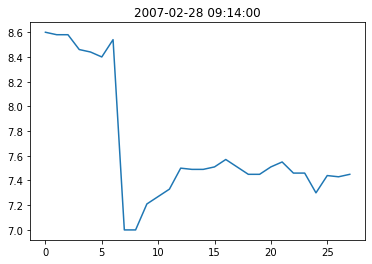

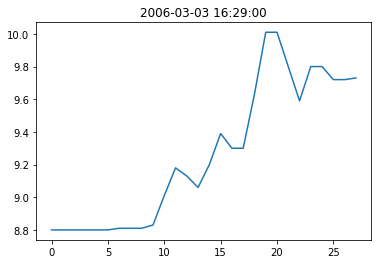

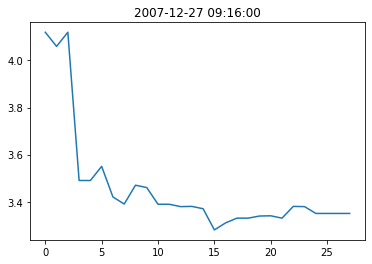

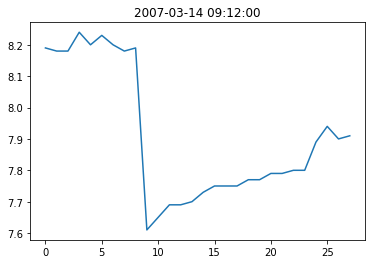

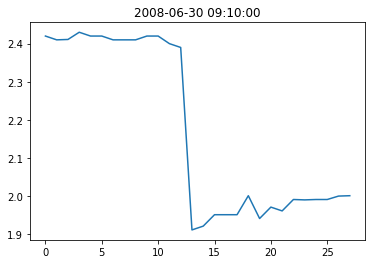

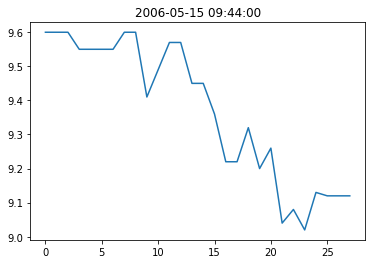

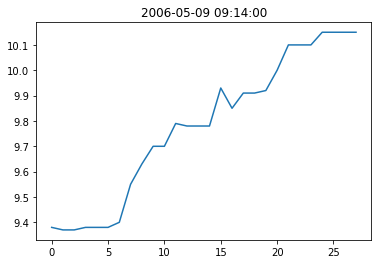

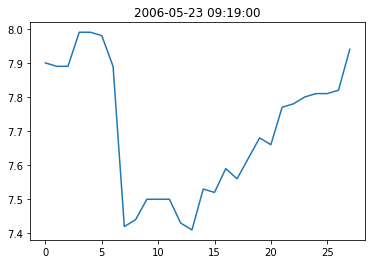

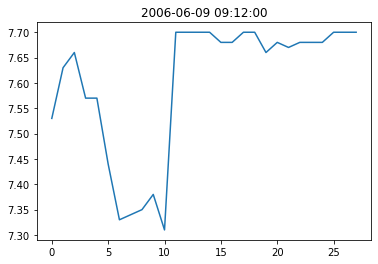

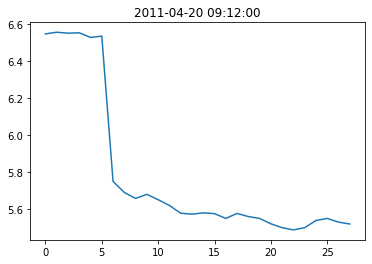

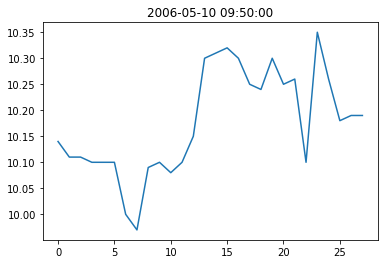

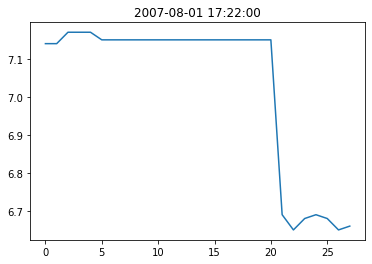

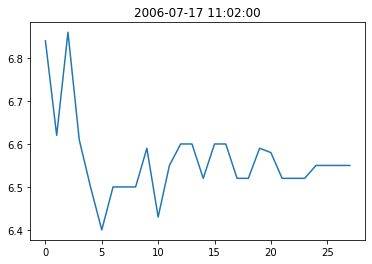

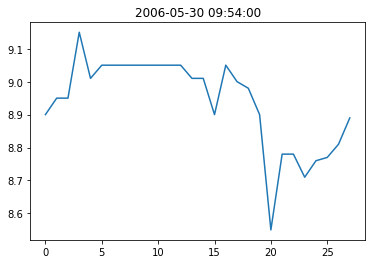

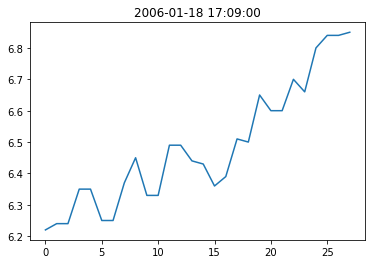

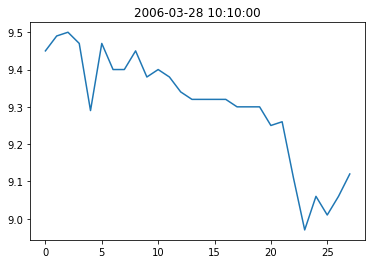

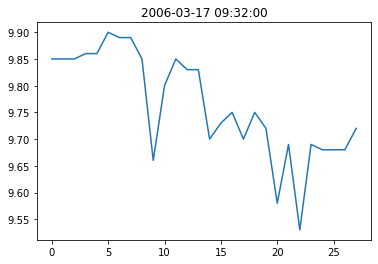

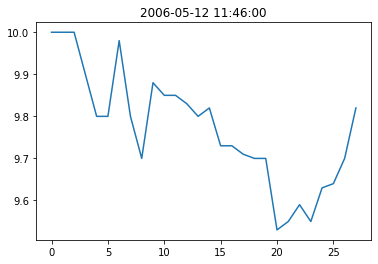

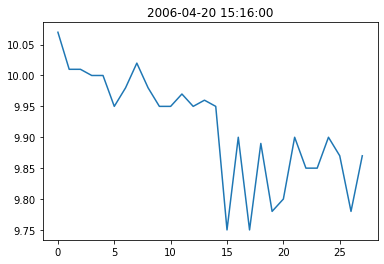

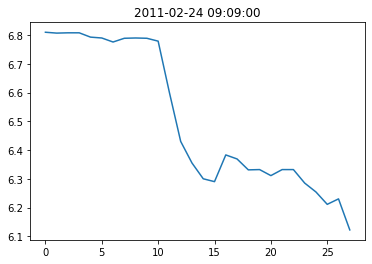

In [128]:
for ind in df_results.sort_values("final_score",ascending=False).index[0:20]:
    sub_curve(df_results,ind)